In [1]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (側視圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


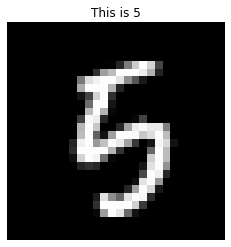

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [27]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,213,69,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,177,37,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,120,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,171,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### 分類: 
   
     一根: loss=> binary_crossentropy
           Act=> sigmoid
     多根: loss=> categorical_crossentropy
           Act=> softmax
### 動能，步伐優化:
     optimizer="adam"

### 確立目標及求解方法：以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)

In [29]:
mlp.compile(loss="categorical_crossentropy", 
           optimizer="adam", 
           metrics=["accuracy"])

In [31]:
# 對圖片處裡: 攤開(1D) -> 0~1 (一開始隨機的 WEIGHT才能配合上)
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
x_train_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
# 對答案處理: One-Hot Encoding > 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
print("Before: ", y_train[0])
print("After: ", y_train_cat[0])

Before:  5
After:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
# batch_size: 看多少筆資料調整(梯度下降)一次
# 看資料決定: 資料小(100~200) 資料大(10~20)
# epochs: 整份資料(60000)看幾次[模型何時該停止訓練]
# val_loss: 平滑時就該停下來了
# validation_split: 用沒看過得資料 來驗證模型好壞
# verbose: log多寡(1: 最詳細, 2: 必要的, 0: 不印)
# 調整次數: 60000 * 0.9 * 10(epochs)
mlp.fit(x=x_train_norm, y=y_train_cat, 
        batch_size=200, 
        epochs=10, 
        validation_split=0.1,
        verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 2s - loss: 0.3665 - acc: 0.8988 - val_loss: 0.1612 - val_acc: 0.9575
Epoch 2/10
 - 1s - loss: 0.1650 - acc: 0.9534 - val_loss: 0.1220 - val_acc: 0.9668
Epoch 3/10
 - 1s - loss: 0.1158 - acc: 0.9669 - val_loss: 0.0962 - val_acc: 0.9728
Epoch 4/10
 - 1s - loss: 0.0867 - acc: 0.9749 - val_loss: 0.0863 - val_acc: 0.9752
Epoch 5/10
 - 1s - loss: 0.0678 - acc: 0.9809 - val_loss: 0.0798 - val_acc: 0.9793
Epoch 6/10
 - 1s - loss: 0.0549 - acc: 0.9846 - val_loss: 0.0766 - val_acc: 0.9782
Epoch 7/10
 - 1s - loss: 0.0444 - acc: 0.9877 - val_loss: 0.0874 - val_acc: 0.9737
Epoch 8/10
 - 1s - loss: 0.0372 - acc: 0.9896 - val_loss: 0.0679 - val_acc: 0.9808
Epoch 9/10
 - 1s - loss: 0.0297 - acc: 0.9927 - val_loss: 0.0749 - val_acc: 0.9778
Epoch 10/10
 - 1s - loss: 0.0235 - acc: 0.9948 - val_loss: 0.0676 - val_acc: 0.9800


In [34]:
mlp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 15us/step


[0.06265316469175741, 0.9804]

In [11]:
from sklearn.metrics import confusion_matrix
base = list(range(10))
i = [str(b) + "(原本)" for b in base]
c = [str(b) + "(預測)" for b in base]

pre = mlp.predict_classes(x_test_norm)
# confusion_matrix(y_test, pre)

pd.DataFrame(confusion_matrix(y_test, pre),
            columns=c,
            index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),966,0,0,0,0,2,4,1,4,3
1(原本),0,1127,2,1,0,1,1,0,3,0
2(原本),4,2,1005,4,2,1,2,7,5,0
3(原本),0,2,6,986,0,4,0,3,2,7
4(原本),0,1,4,1,958,0,1,1,1,15
5(原本),2,0,0,5,1,876,3,1,3,1
6(原本),5,3,1,1,4,7,934,0,3,0
7(原本),1,9,5,5,0,0,0,998,1,9
8(原本),3,2,3,7,4,5,0,3,944,3
9(原本),1,3,0,3,5,5,0,3,1,988


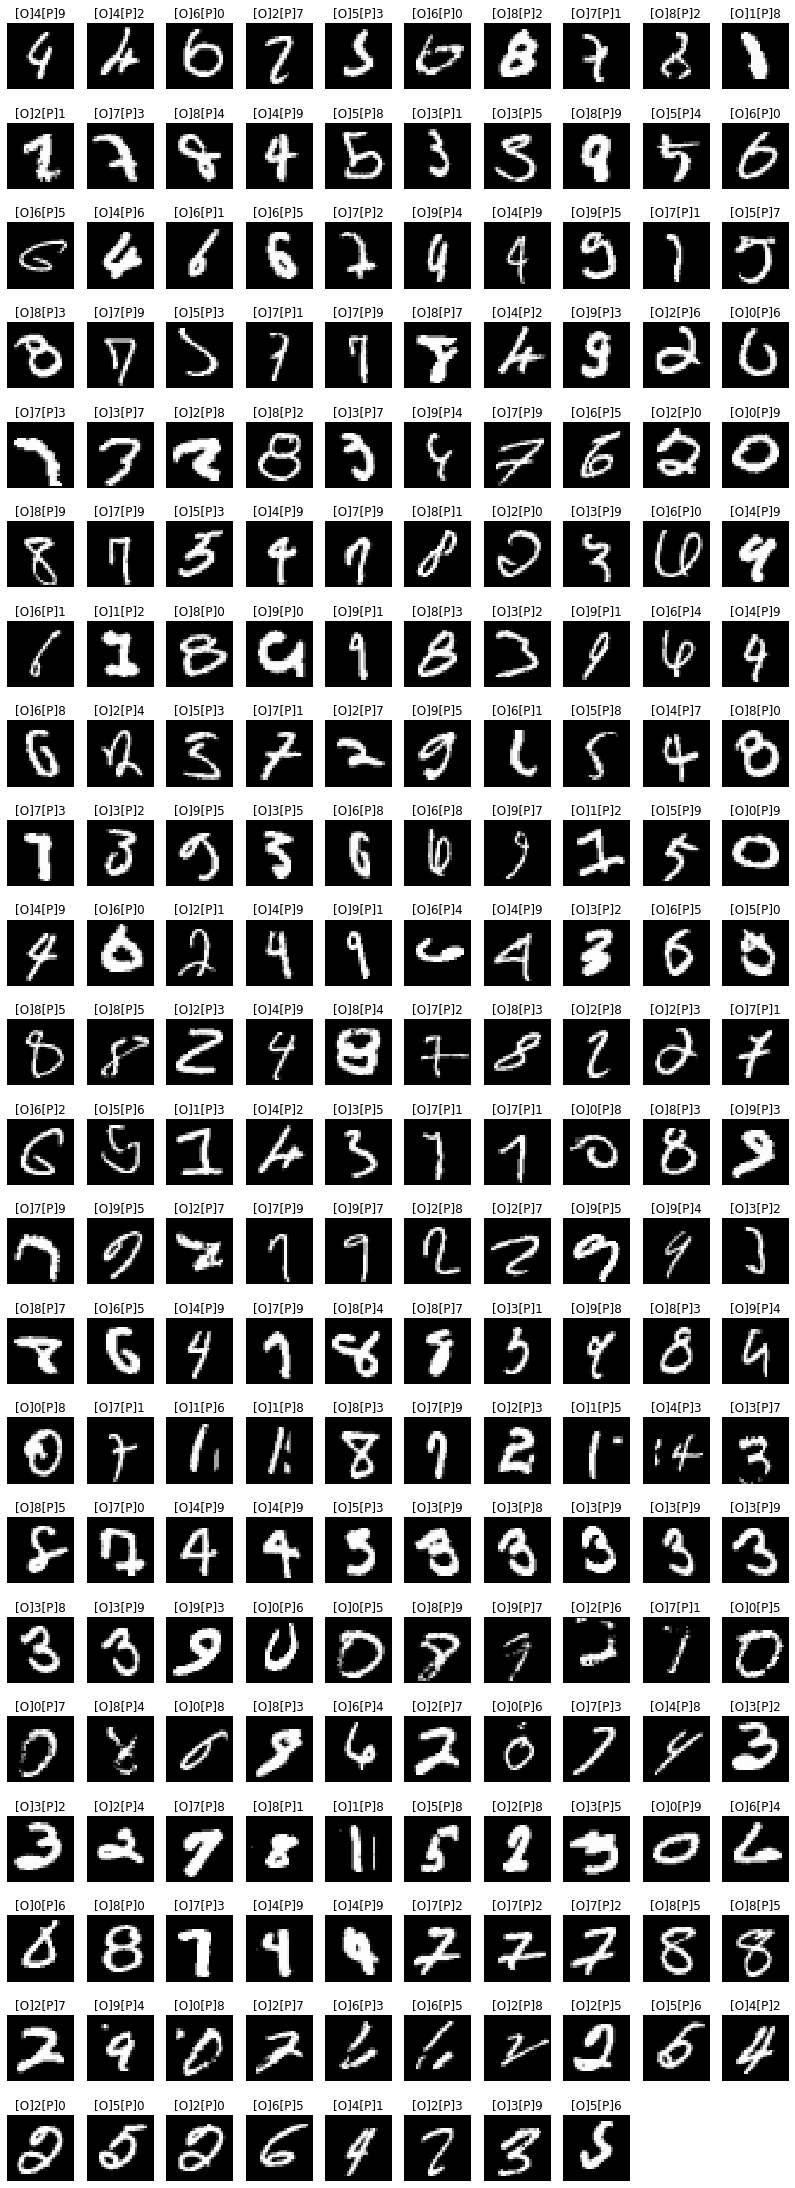

In [12]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤圖片的正確答案
false_answer = y_test[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]" + str(false_answer[i]) + "[P]" + str(false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [23]:
from keras.preprocessing.image import load_img
fp = input("你的測試圖片")
img = load_img(fp, target_size=(28, 28))
# np.array(img)
# 先灰階
grayimg = np.array(img.convert("L"))
# 重新定義圖片大小
grayimg = grayimg.reshape(784) / (255)

grayimgnp = np.array([grayimg])
pre = mlp.predict_classes(grayimgnp)
print("我覺得是", pre)
img

你的測試圖片test.png
我覺得是 [4]
